In [7]:
#import dependencies
import requests
import pandas as pd
from census import Census
import seaborn as sns
from us import states
import matplotlib.pyplot as plt
from config import c_key

c = Census(c_key)

In [2]:
#QUEREY PARAMETER
#occupation query prefix
oc = "C24010_"
#construction occupation codes
con = ["030E", "031E", "032E", "033E","066E", "067E", "068E", "069E"]
con_e = ["C24010_" + c for c in con]
#print(con_e)

#male STEM occupation codes
stem = ["007E", "008E", "009E","043E", "044E", "045E"]
#female STEM occupation codes
stem_e = ["C24010_" + s for s in stem]
#print(stem_e)

#active millitary citizens
mil = "B23025_006E"

#number of employed citizens
emp = "B23025_004E"

#per capita income
inc_pc = "B19301_001E"

#citizens below poverty line
poverty = "B17001_003E"

#number of citizens holding bachelor's degrees
bach = "B15003_022E"


In [3]:
#census attribute codes: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b
c16_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:201','in': 'state:48'}, year=2016)
#add api data to dataframe
df16=pd.DataFrame(c16_data)

#rename columns
columns = ['Total Population','Residents w/o HS Eduaction','Resident w/ Bachelors Degree','Residents Below Poverty Line',
             'Per Capita Income', 'Employed Residents','Labor Force','Active Military','S1','S2','S3','C1','C2','C3','C4',
                'S4','S5','S6','C5','C6','C7','C8','Location','County','State',]
df16.columns = columns

#Run for 2015
#-------------------------------------------------------------------------------------
c15_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:201','in': 'state:48'}, year=2015)
#add api data to dataframe
df15=pd.DataFrame(c15_data)

#rename columns
df15.columns = columns

#Run for 2014
#-------------------------------------------------------------------------------------
c14_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:201','in': 'state:48'}, year=2014)
#add api data to dataframe
df14=pd.DataFrame(c14_data)

#rename columns
df14.columns = columns

#Run for 2013
#-------------------------------------------------------------------------------------
c13_data = c.acs5.get(("NAME", mil+","+emp+","+inc_pc+","+poverty+","+bach,
                    'C24010_030E', 'C24010_031E', 'C24010_032E', 'C24010_033E', 
                    'C24010_066E', 'C24010_067E','C24010_068E', 'C24010_069E',
                    'C24010_007E', 'C24010_008E', 'C24010_009E', 'C24010_043E', 
                    'C24010_044E', 'C24010_045E','B23025_002E','B01003_001E',"B15003_002E"), 
                    {'for': 'county:201','in': 'state:48'}, year=2013)
#add api data to dataframe
df13=pd.DataFrame(c13_data)

#rename columns
df13.columns = columns



In [4]:
#calcualte new columns

df16['Construction Residents']=(df16['C1']+df16['C2']+df16['C3']+df16['C4']+df16['C5']+df16['C6']+df16['C7']+df16['C8'])
df16['STEM Residents']=(df16['S1']+df16['S2']+df16['S3']+df16['S4']+df16['S5']+df16['S6'])
df16['Poverty Percentage']=df16['Residents Below Poverty Line']/df16['Total Population']

df15['Construction Residents']=(df15['C1']+df15['C2']+df15['C3']+df15['C4']+df15['C5']+df15['C6']+df15['C7']+df15['C8'])
df15['STEM Residents']=(df15['S1']+df15['S2']+df15['S3']+df15['S4']+df15['S5']+df15['S6'])
df15['Poverty Percentage']=df15['Residents Below Poverty Line']/df15['Total Population']

df14['Construction Residents']=(df14['C1']+df14['C2']+df14['C3']+df14['C4']+df14['C5']+df14['C6']+df14['C7']+df14['C8'])
df14['STEM Residents']=(df14['S1']+df14['S2']+df14['S3']+df14['S4']+df14['S5']+df14['S6'])
df14['Poverty Percentage']=df14['Residents Below Poverty Line']/df14['Total Population']

df13['Construction Residents']=(df13['C1']+df13['C2']+df13['C3']+df13['C4']+df13['C5']+df13['C6']+df13['C7']+df13['C8'])
df13['STEM Residents']=(df13['S1']+df13['S2']+df13['S3']+df13['S4']+df13['S5']+df13['S6'])
df13['Poverty Percentage']=df13['Residents Below Poverty Line']/df13['Total Population']

In [5]:
#filter df
clean_df16 = df16[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage','Residents w/o HS Eduaction','Resident w/ Bachelors Degree',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


clean_df15 = df15[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage','Residents w/o HS Eduaction','Resident w/ Bachelors Degree',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


clean_df14 = df14[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage','Residents w/o HS Eduaction','Resident w/ Bachelors Degree',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


clean_df13 = df13[['Total Population','Per Capita Income','Residents Below Poverty Line','Poverty Percentage','Residents w/o HS Eduaction','Resident w/ Bachelors Degree',
              'Employed Residents','Labor Force','Active Military','Construction Residents','STEM Residents',
              'Location']]


first_merge = pd.merge(clean_df16, clean_df15, how='outer')
second_merge = pd.merge(first_merge, clean_df14, how='outer')
final_merge = pd.merge(second_merge, clean_df13, how='outer')
print(final_merge)

   Total Population  Per Capita Income  Residents Below Poverty Line  \
0         4434257.0            29850.0                      342085.0   
1         4356362.0            29047.0                      348592.0   
2         4269608.0            28454.0                      351120.0   
3         4182285.0            27899.0                      347326.0   

   Poverty Percentage  Residents w/o HS Eduaction  \
0            0.077146                     69736.0   
1            0.080019                     65998.0   
2            0.082237                     62637.0   
3            0.083047                     59098.0   

   Resident w/ Bachelors Degree  Employed Residents  Labor Force  \
0                      538089.0           2291752.0    2130543.0   
1                      517569.0           2251934.0    2081889.0   
2                      497923.0           2202396.0    2021179.0   
3                      479559.0           2156598.0    1970541.0   

   Active Military  Construction

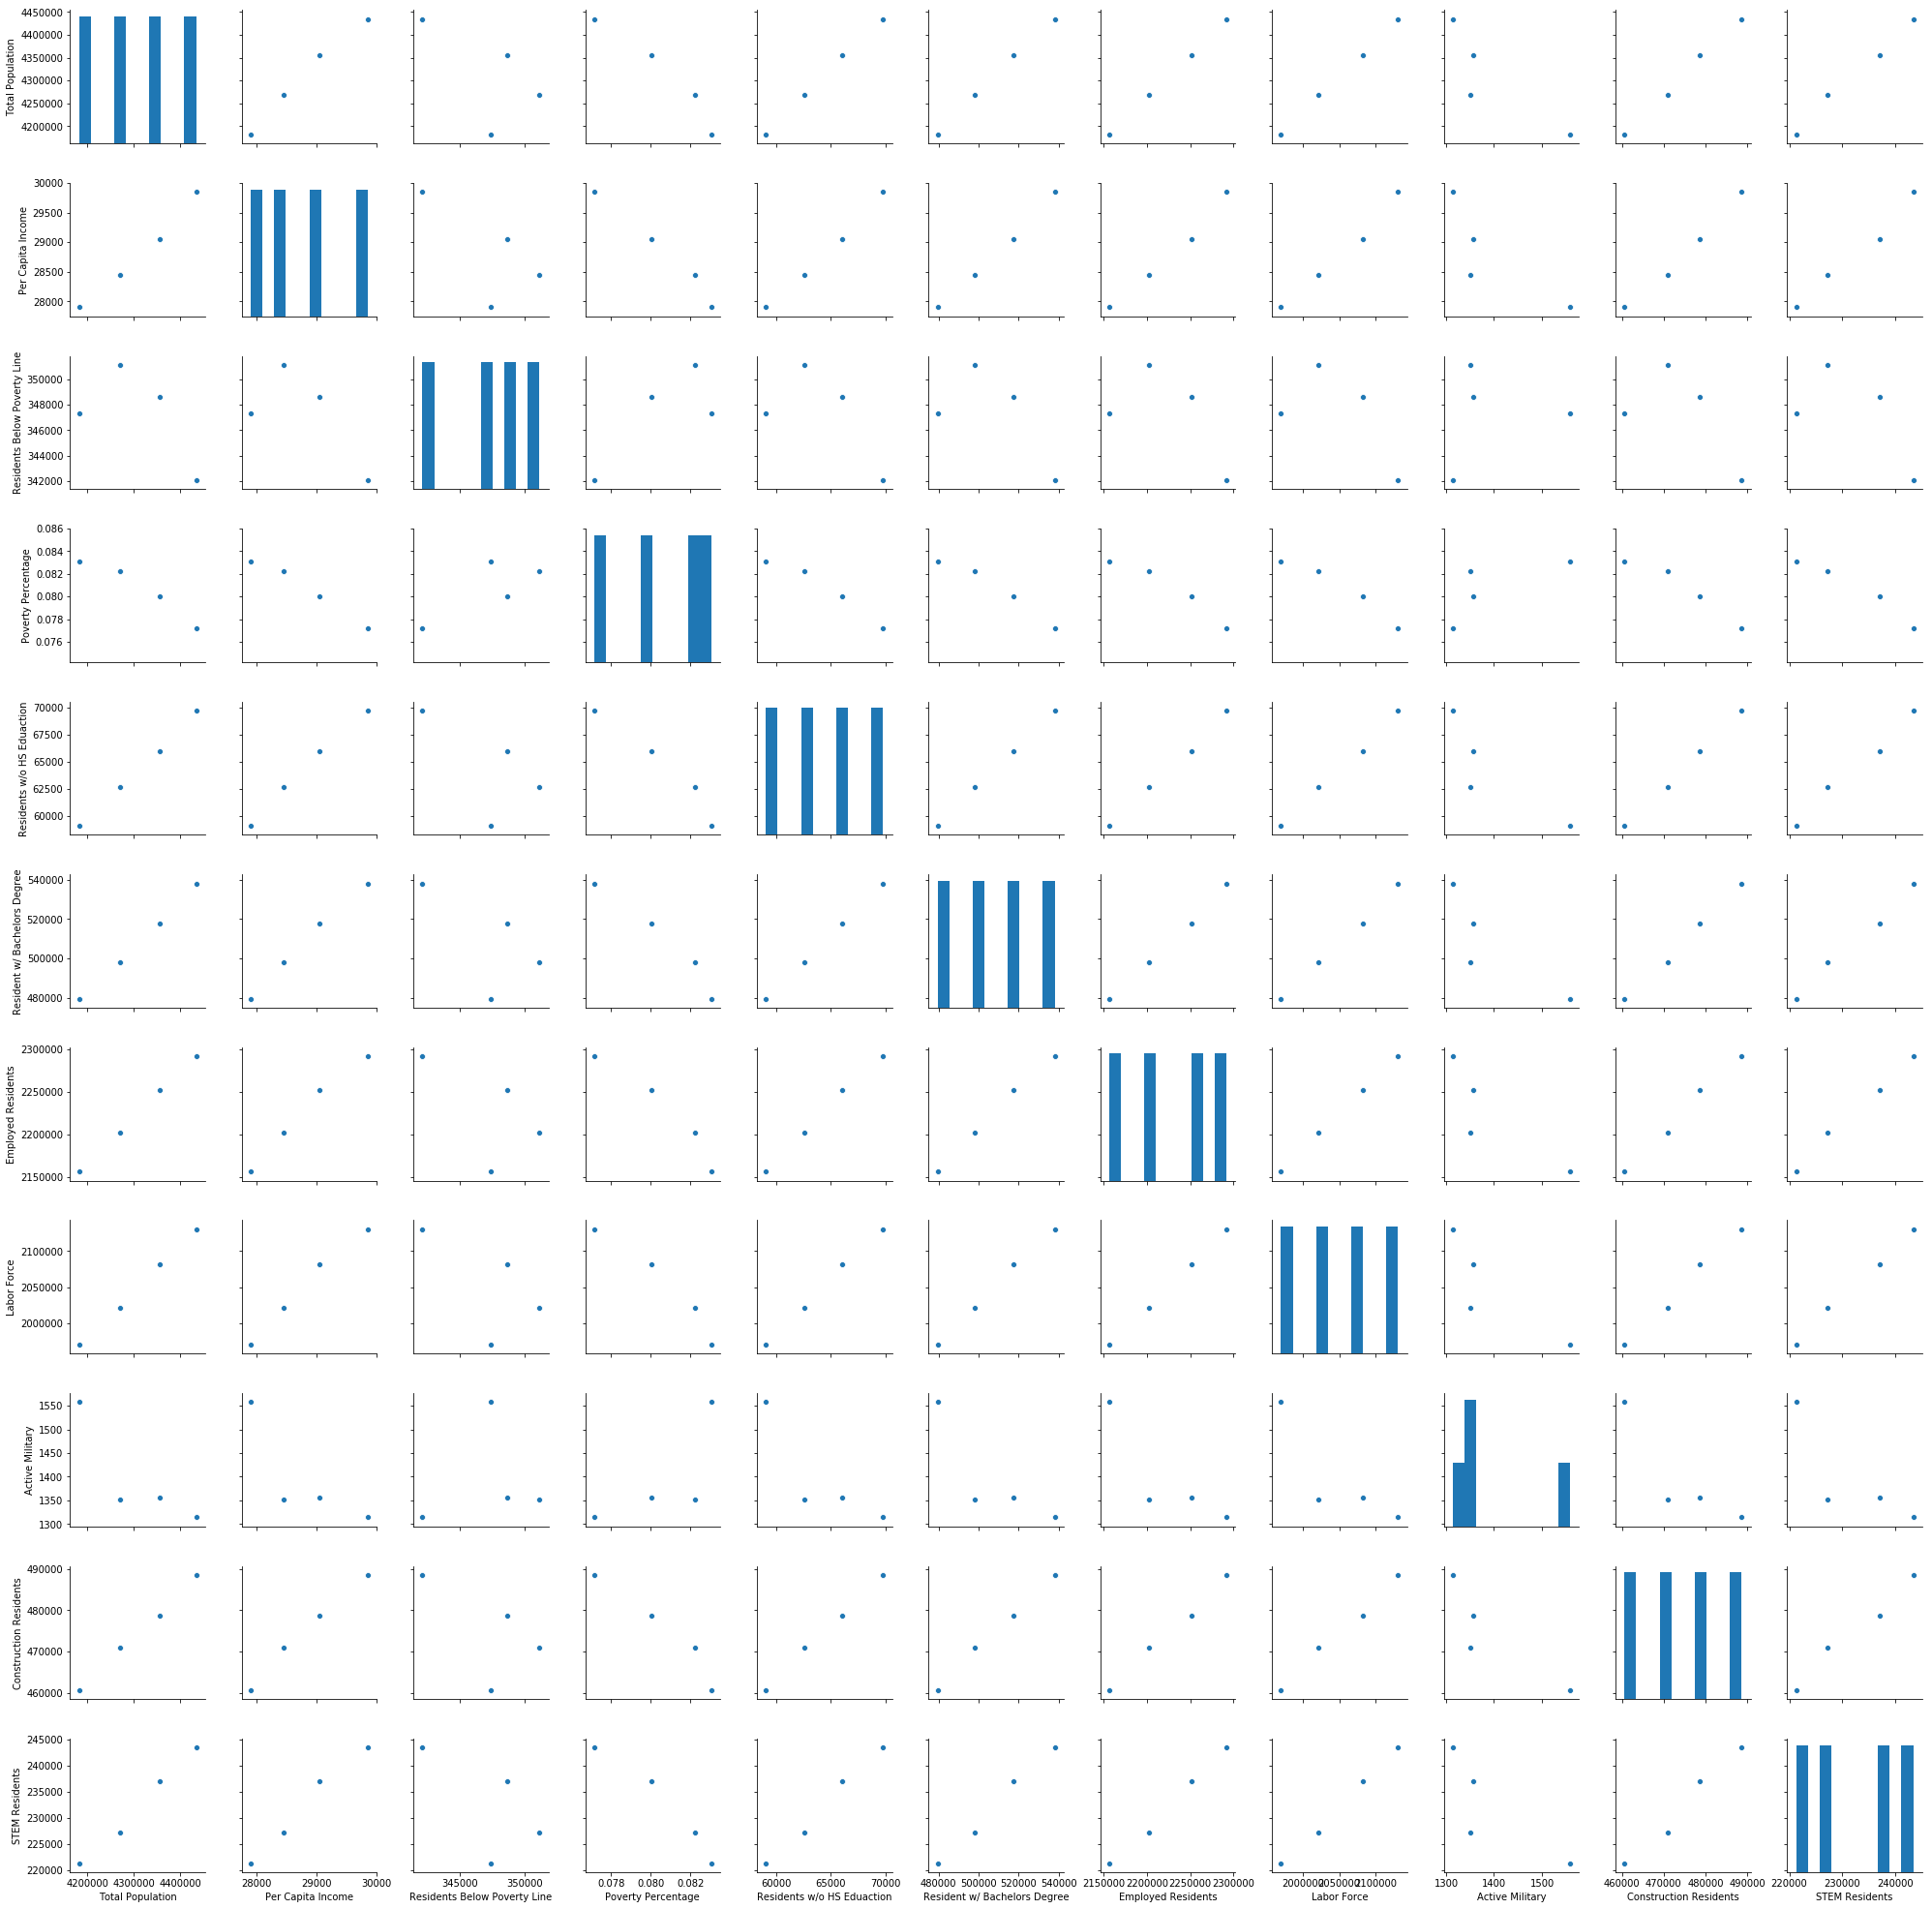

In [9]:
sns.pairplot(final_merge)
plt.show()

#these don't mean anything, I just wanted to get a little practice using them


